In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

文字データを0,1のタグに変換する処理。
sklearnkitのOneHotEncoderを用いて処理

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,3] = labelencoder_X.fit_transform(X[:,3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

第一列をゼロとするため、削除

In [5]:
X = X[:, 1:]

In [6]:
pd.DataFrame(X).head()

,0,1,2,3,4
0,0.0,1.0,165349.20,136897.80,471784.10
1,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,142107.34,91391.77,366168.42


In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [9]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_pred = regressor.predict(X_test)

In [13]:
pd.DataFrame(np.c_[y_pred, y_test])

,0,1
0,103015.201598,103282.38
1,132582.277608,144259.40
2,132447.738452,146121.95
3,71976.098513,77798.83
4,178537.482211,191050.39
5,116161.242302,105008.31
6,67851.692097,81229.06
7,98791.733747,97483.56
8,113969.435330,110352.25
9,167921.065696,166187.94


In [12]:
import statsmodels.formula.api as sm

In [17]:
pd.DataFrame(X).head()

,0,1,2,3,4
0,0.0,1.0,165349.20,136897.80,471784.10
1,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,142107.34,91391.77,366168.42


In [18]:
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)

In [19]:
pd.DataFrame(X).head()

,0,1,2,3,4,5
0,1.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,1.0,0.0,153441.51,101145.55,407934.54
3,1.0,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,1.0,0.0,142107.34,91391.77,366168.42


In [23]:
X_opt = X[:, [0,1,2,3,4,5]]

In [24]:
pd.DataFrame(X_opt).head()

,0,1,2,3,4
0,1.0,0.0,1.0,165349.20,471784.10
1,1.0,0.0,0.0,162597.70,443898.53
2,1.0,1.0,0.0,153441.51,407934.54
3,1.0,0.0,1.0,144372.41,383199.62
4,1.0,1.0,0.0,142107.34,366168.42


In [26]:
regressorOLS = sm.OLS(endog=y, exog=X_opt).fit()

In [30]:
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sat, 02 Jun 2018   Prob (F-statistic):           9.72e-29
Time:                        14:40:49   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.696e+04   3119.471     15.053      0.000    4.07e+04    5.32e+04
x1           140.7869   3341.599      0.042      0.967   -6589.538    6871.112
x2           -19.5234   3229.138     -0.006      0.995   -6523.340    6484.294
x3             0.7967      0.042     18.771      0.000       0.711       0.882
x4             0.0298      0.016      1.842      0.072      -0.003       0.062
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     8.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X_opt = X[:, [0,3,4,5]]
regressorOLS = sm.OLS(endog=y, exog=X_opt).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 02 Jun 2018   Prob (F-statistic):           4.53e-30
Time:                        14:42:11   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X_opt = X[:, [0,3,5]]
regressorOLS = sm.OLS(endog=y, exog=X_opt).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 02 Jun 2018   Prob (F-statistic):           2.16e-31
Time:                        14:45:50   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X_opt = X[:, [0,3]]
regressorOLS = sm.OLS(endog=y, exog=X_opt).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 02 Jun 2018   Prob (F-statistic):           3.50e-32
Time:                        14:48:19   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [52]:
xdf = pd.DataFrame(X)
xdf[6] = pd.DataFrame(y)

In [53]:
xdf.head()

,0,1,2,3,4,5,6
0,1.0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,1.0,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,1.0,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,1.0,1.0,0.0,142107.34,91391.77,366168.42,166187.94


In [55]:
import seaborn as sns
%matplotlib inline

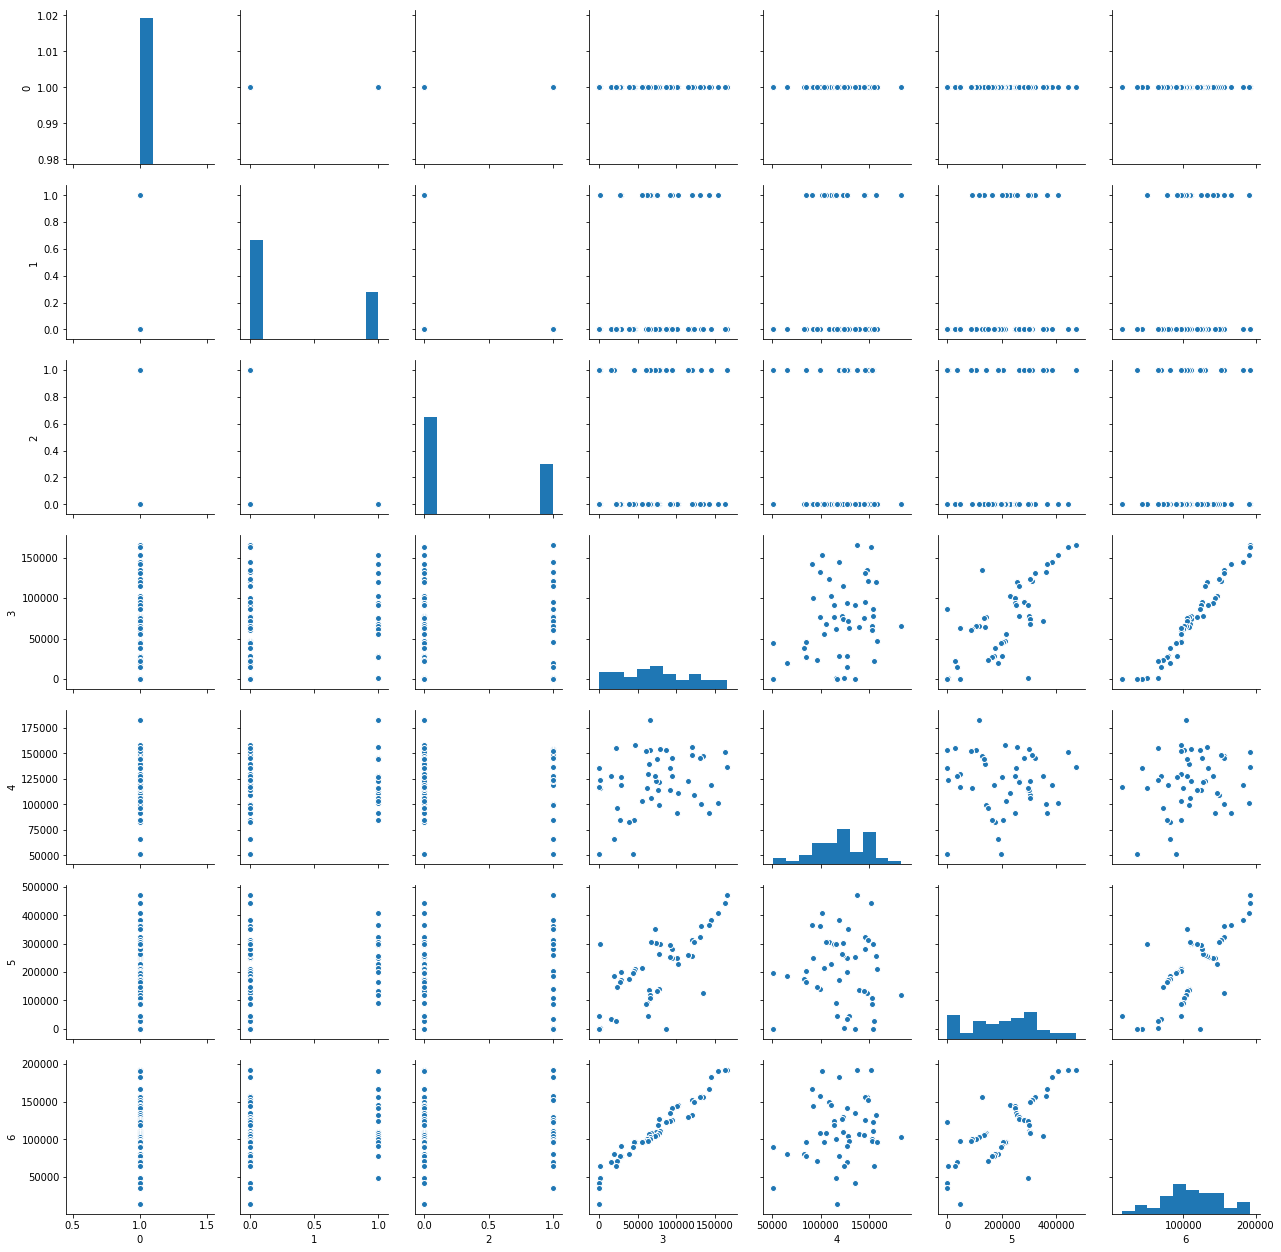

In [56]:
sns.pairplot(xdf)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X[:,1:], y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.mean((y_pred - y_test)**2) / 10000000

8.350286403257469

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X[:,[0,3]], y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.mean((y_pred - y_test)**2) / 10000000

6.847344071905931

Text(0.5,1,'Residual Plots')

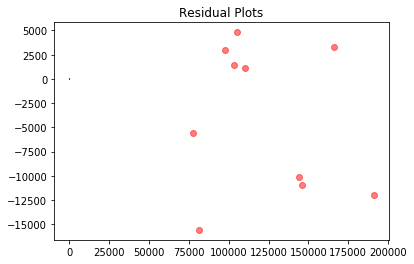

In [94]:
# テスト用のデータの残差プロットです。
test = plt.scatter(y_test,(y_pred-y_test),c='r',alpha=0.5)

# y=0の水平な線を描いておきます。
plt.hlines(y=0,xmin=-10,xmax=50)
plt.title('Residual Plots')

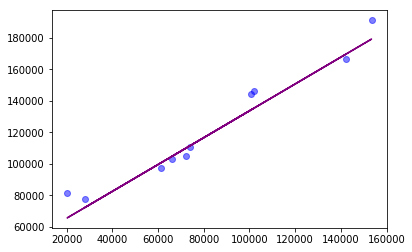

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_test[:,1], y_test, alpha = 0.5, color="Blue")
ax.plot(X_test[:,1], y_pred, color = "Purple")

In [105]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


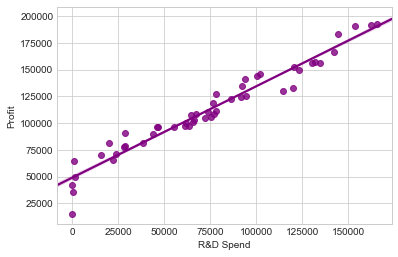

In [110]:
sns.set_style("whitegrid")
sns.regplot(x="R&D Spend", y="Profit", data=dataset, ci=50, color="Purple")

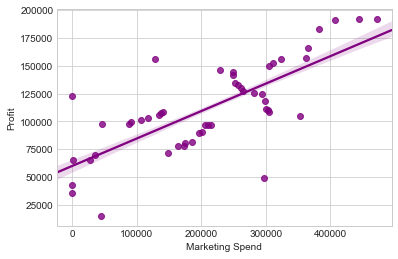

In [112]:
sns.set_style("whitegrid")
sns.regplot(x="Marketing Spend", y="Profit", data=dataset, ci=50, color="Purple")

In [130]:
exp = pd.read_csv("example.csv")

In [134]:
exp = exp.drop("Unnamed: 6", axis=1)

In [135]:
exp

,X1,Y1,X2,Y2,X3,Y3
0,1.996,2.672,1.471,-1.106,3.511,7.620
1,2.765,1.502,1.744,-1.112,2.273,6.813
2,3.645,1.226,2.409,-2.787,4.663,2.125
3,4.148,3.267,2.629,-0.943,5.228,8.641
4,4.984,3.525,3.440,-4.070,1.254,7.334
5,5.340,1.835,3.506,-1.680,6.444,0.520
6,5.535,3.317,4.123,-4.013,7.184,3.304
7,6.214,4.528,4.699,-2.282,1.026,7.918
8,6.621,3.199,4.704,-5.034,9.597,9.885
9,7.582,2.853,4.853,-2.234,4.197,2.764


In [155]:
exp['offset'] = 1

In [156]:
y_exp = exp['Y3']
x_exp = exp[['offset','X3']].values

In [157]:
regressorOLS = sm.OLS(endog=y_exp, exog=x_exp).fit()
regressorOLS.summary()

/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y3   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.1443
Date:                Sat, 02 Jun 2018   Prob (F-statistic):              0.710
Time:                        18:21:53   Log-Likelihood:                -38.267
No. Observations:                  16   AIC:                             80.53
Df Residuals:                      14   BIC:                             82.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2190      1.455      3.588      0.003       2.099       8.339
x1             0.0970      0.255      0.380      0.710      -0.451       0.644
==============================================================================
Omnibus:                        1.558   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                1.072
Skew:                          -0.366   Prob(JB):                        0.585
Kurtosis:                       1.964   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

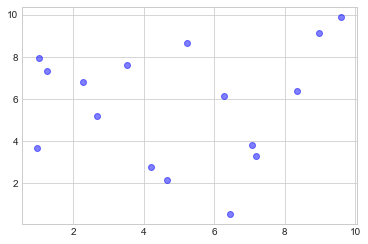

In [144]:
plt.scatter(x=exp['X3'], y=exp['Y3'],alpha = 0.5, color="Blue")

In [142]:
exp.corr()

,X1,Y1,X2,Y2,X3,Y3
X1,1.000000,0.822217,0.982800,-0.749480,0.296782,-0.074506
Y1,0.822217,1.000000,0.858146,-0.628159,0.029014,0.083908
X2,0.982800,0.858146,1.000000,-0.719917,0.298873,-0.045941
Y2,-0.749480,-0.628159,-0.719917,1.000000,-0.122266,0.013125
X3,0.296782,0.029014,0.298873,-0.122266,1.000000,0.100997
Y3,-0.074506,0.083908,-0.045941,0.013125,0.100997,1.000000
